![fatigued-truck-driver-1.gif](attachment:fatigued-truck-driver-1.gif)

## Driver drowsiness detection is a car safety technology which helps prevent accidents caused by the driver getting drowsy. Various studies have suggested that around 20% of all road accidents are fatigue-related, up to 50% on certain roads.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

# labels

In [2]:
!git clone https://github.com/visheshvats/Driver.git

Cloning into 'Driver'...
remote: Enumerating objects: 2926, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 2926 (delta 1), reused 19 (delta 1), pack-reused 2907
Receiving objects: 100% (2926/2926), 161.63 MiB | 18.48 MiB/s, done.
Resolving deltas: 100% (183/183), done.
Checking out files: 100% (2913/2913), done.


In [3]:
labels = os.listdir("/content/Driver/train")

In [4]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

# visualize random 1 image

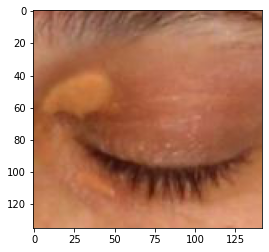

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/Driver/train/Closed/_1.jpg"))

# image array

In [6]:
a = plt.imread("/content/Driver/train/Closed/_100.jpg")

# image shape

In [7]:
a.shape

(287, 288, 3)

# visualize yawn image. 
# Here background is unnecessary. we need only face image array

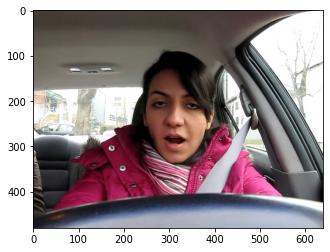

In [8]:
plt.imshow(plt.imread("/content/Driver/train/yawn/10.jpg"))

# for yawn and not_yawn. Take only face

In [12]:
def face_for_yawn(direc="/content/Driver/train", face_cas_path="/content/Driver/Image_Prediction/a/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


# for closed and open eye

In [13]:
def get_data(dir_path="/content/Driver/train/", face_cas="/content/Driver/Image_Prediction/a/haarcascade_frontalface_default.xml", eye_cas="../input/prediction-images/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [ ]:
data_train = get_data()

2
3


# extend data and convert array

In [ ]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

# new variable to store

In [ ]:
new_data = append_data()

0
1
2
3


# separate label and features

In [ ]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

# reshape the array

In [ ]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

# LabelBinarizer

# Prediction 
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [ ]:
from IPython.display import Image
# Image('bp.png')

1


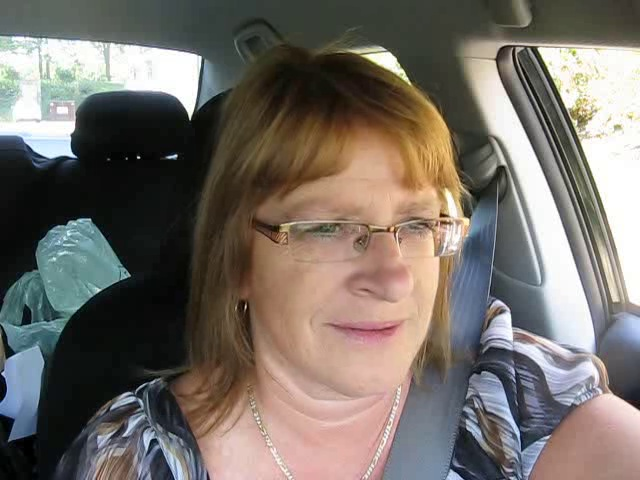

In [ ]:
# prepare("../input/drowsiness-dataset/train/no_yawn/1068.jpg")
prediction = model.predict([prepare("../input/drowsiness-dataset/train/no_yawn/1067.jpg")])
print(np.argmax(prediction))
Image('../input/drowsiness-dataset/train/no_yawn/1067.jpg')

In [ ]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/Closed/_101.jpg")])
np.argmax(prediction)

2

3


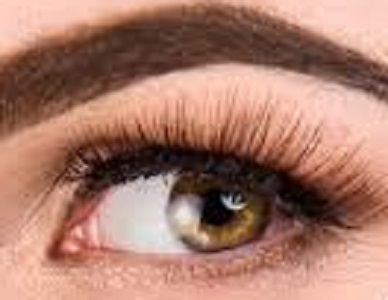

In [ ]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/Open/_104.jpg")])
print(np.argmax(prediction))
Image("../input/drowsiness-dataset/train/Open/_104.jpg")

In [ ]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/yawn/113.jpg")])
np.argmax(prediction)

3

# If you like please upvote